# Load packages

In [2]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import pandas as pd

# Default model setup - Fishing vessels only - Same dates & ROI 
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Compare results for fishing vessels, cargo and tankers, and fishing, cargo, and tankers. The comparison is done on the fishing vessel only validation set used during the training of fishing vessel VRNN model (see 'Explore Training & Validation Curves - Fishing Vessels.ipynb')

## Epoch level learning curves

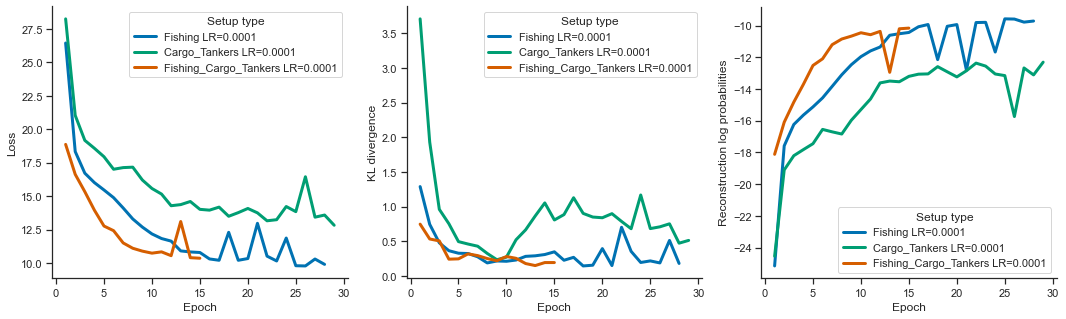

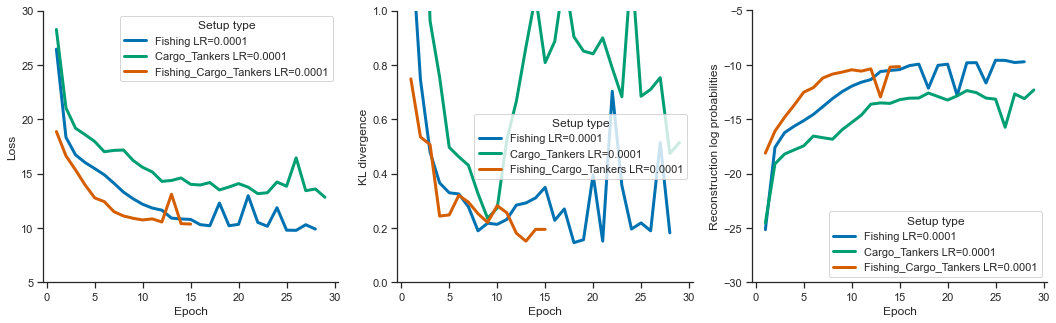

In [6]:
# Use the SummaryModels class
generative_dist = "Isotropic_Gaussian"
setup_type = "Fishing"
model_prefix = "Fishing_vessels_only_"
fishing_file = "RegionSkagen_01062019_30092019_Fish_14400_86400_600"
#summary_models_fish = SummaryModels("RegionSkagen_01062019_30092019_Fish_14400_86400_600",
#                                    model_prefix=model_prefix, generative_dist=generative_dist)
# df_fish = summary_models_fish.load_curves_df(setup_type, validation_only=True)

learning_rate = 0.0001
setup_type = "Fishing LR=0.0001"
summary_models_fish_0001 = SummaryModels("RegionSkagen_01062019_30092019_Fish_14400_86400_600",
                                         model_prefix=model_prefix, generative_dist=generative_dist, 
                                         learning_rate=learning_rate)
df_fish_0001  = summary_models_fish_0001.load_curves_df(setup_type, validation_only=True)


#learning_rate = 0.00005
#setup_type = "Fishing LR=0.00005"
#summary_models_fish_00005 = SummaryModels("RegionSkagen_01062019_30092019_Fish_14400_86400_600",
#                                         model_prefix=model_prefix, generative_dist=generative_dist, 
#                                         learning_rate=learning_rate)
#df_fish_00005 = summary_models_fish_00005.load_curves_df(setup_type, validation_only=True)

#learning_rate = 0.00001
#setup_type = "Fishing LR=0.00001"
#summary_models_fish_00001 = SummaryModels("RegionSkagen_01062019_30092019_Fish_14400_86400_600",
#                                         model_prefix=model_prefix, generative_dist=generative_dist, 
#                                         learning_rate=learning_rate)
#df_fish_00001  = summary_models_fish_00001.load_curves_df(setup_type, validation_only=True)


# setup_type = "Cargo_Tankers"
#summary_models_carg_tank = SummaryModels("RegionSkagen_01062019_30092019_CargTank_14400_86400_600",
#                                         model_prefix=model_prefix, generative_dist=generative_dist)
# df_carg_tank = summary_models_carg_tank.load_curves_df(setup_type, validation_only=True)
# df_track_lvl_carg_tank = summary_models_carg_tank.run_evaluation(setup_type=setup_type,
#                                                                 fishing_file=fishing_file)["TrajectoryLevelData"] 

learning_rate = 0.0001
setup_type = "Cargo_Tankers LR=0.0001"
summary_models_carg_tank_0001 = SummaryModels("RegionSkagen_01062019_30092019_CargTank_14400_86400_600",
                                              model_prefix=model_prefix, generative_dist=generative_dist,
                                              learning_rate=learning_rate)
df_carg_tank_0001 = summary_models_carg_tank_0001.load_curves_df(setup_type, validation_only=True)
# df_track_lvl_carg_tank = summary_models_carg_tank.run_evaluation(setup_type=setup_type,
#                                                                 fishing_file=fishing_file)["TrajectoryLevelData"] 

#setup_type = "Fishing_Cargo_Tankers"
#summary_models_fish_carg_tank = SummaryModels("RegionSkagen_01062019_30092019_FishCargTank_14400_86400_600",
#                                              model_prefix=model_prefix, generative_dist=generative_dist)
#df_fish_carg_tank = summary_models_fish_carg_tank.load_curves_df(setup_type, validation_only=True)
# df_track_lvl_fish_carg_tank = summary_models_fish_carg_tank.run_evaluation(setup_type=setup_type, 
 #                                                                           fishing_file=fishing_file)["TrajectoryLevelData"]

learning_rate = 0.0001
setup_type = "Fishing_Cargo_Tankers LR=0.0001"
summary_models_fish_carg_tank_0001 = SummaryModels("RegionSkagen_01062019_30092019_FishCargTank_14400_86400_600",
                                                   model_prefix=model_prefix, generative_dist=generative_dist, 
                                                   learning_rate=learning_rate)
df_fish_carg_tank_0001  = summary_models_fish_carg_tank_0001.load_curves_df(setup_type, validation_only=True)
# df_track_lvl_fish_carg_tank = summary_models_fish_carg_tank.run_evaluation(setup_type=setup_type, 
 #                                                                           fishing_file=fishing_file)["TrajectoryLevelData"] 
    
#learning_rate = 0.00005
#s1etup_type = "Fishing_Cargo_Tankers LR=0.00005"
#summary_models_fish_carg_tank_00005 = SummaryModels("RegionSkagen_01062019_30092019_FishCargTank_14400_86400_600",
#                                                   model_prefix=model_prefix, generative_dist=generative_dist, 
#                                                   learning_rate=learning_rate)
#df_fish_carg_tank_00005  = summary_models_fish_carg_tank_00005.load_curves_df(setup_type, validation_only=True)
# df_track_lvl_fish_carg_tank = summary_models_fish_carg_tank.run_evaluation(setup_type=setup_type, 
#                                                                           fishing_file=fishing_file)["TrajectoryLevelData"] 

# Combine the different vessel type date frames 
# df = pd.concat([df_fish, df_fish_0001, df_fish_00005, df_fish_00001, df_carg_tank,
#                 df_fish_carg_tank, df_fish_carg_tank_0001, df_fish_carg_tank_00005])
#df = pd.concat([df_fish, df_fish_0001, df_fish_00005, df_carg_tank,
#                df_fish_carg_tank, df_fish_carg_tank_0001, df_fish_carg_tank_00005])
df = pd.concat([df_fish_0001, df_carg_tank_0001, df_fish_carg_tank_0001])
df.reset_index(drop=True, inplace=True)

# Plot the learning curves
hue = "Setup type"
#hue_order = ["Fishing", "Fishing LR=0.0001", "Fishing LR=0.00005", "Fishing LR=0.00001", "Cargo_Tankers",
#             "Fishing_Cargo_Tankers","Fishing_Cargo_Tankers LR=0.0001", "Fishing_Cargo_Tankers LR=0.00005"]
hue_order = ["Fishing LR=0.0001", "Cargo_Tankers LR=0.0001", "Fishing_Cargo_Tankers LR=0.0001"]
summary_models_fish_carg_tank_0001.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order)
summary_models_fish_carg_tank_0001.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order,
                                               ylims=[(5, 30), (0, 1.0), (-30, -5)])

## Optimizer steps level learning curves

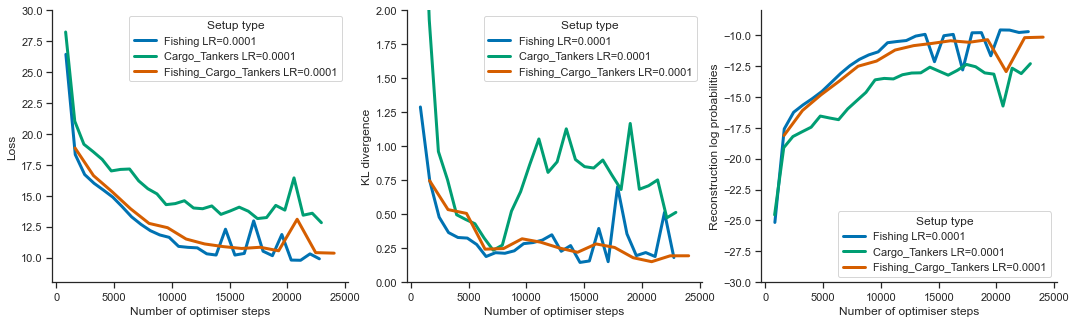

In [12]:
# Use the SummaryModels class
level = "Step"
# df_fish = summary_models_fish.load_curves_df("Fishing", validation_only=True, level=level)
df_fish_0001 = summary_models_fish_0001.load_curves_df("Fishing LR=0.0001", validation_only=True, level=level)
# df_fish_00005 = summary_models_fish_00005.load_curves_df("Fishing LR=0.00005", validation_only=True, level=level)
# df_carg_tank = summary_models_carg_tank.load_curves_df("Cargo_Tankers", validation_only=True, level=level)
df_carg_tank_0001 = summary_models_carg_tank_0001.load_curves_df("Cargo_Tankers LR=0.0001", validation_only=True, level=level)
# df_fish_carg_tank = summary_models_fish_carg_tank.load_curves_df("Fishing_Cargo_Tankers", validation_only=True, level=level)
df_fish_carg_tank_0001 = summary_models_fish_carg_tank_0001.load_curves_df("Fishing_Cargo_Tankers LR=0.0001",
                                                                           validation_only=True, level=level)
# df_fish_carg_tank_00005 = summary_models_fish_carg_tank_00005.load_curves_df("Fishing_Cargo_Tankers LR=0.00005",
#                                                                             validation_only=True, level=level)

# Combine the different vessel type date frames 
#df = pd.concat([df_fish, df_fish_0001, df_fish_00005, df_carg_tank, df_fish_carg_tank,
#                df_fish_carg_tank_0001, df_fish_carg_tank_00005])
df = pd.concat([df_fish_0001, df_carg_tank_0001, df_fish_carg_tank_0001])
df.reset_index(drop=True, inplace=True)

# Plot the learning curves
x = "Number of optimiser steps"
summary_models_fish_carg_tank_0001.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order,
                                               x=x, ylims=[(8, 30), (0, 2.0), (-30, -8)])

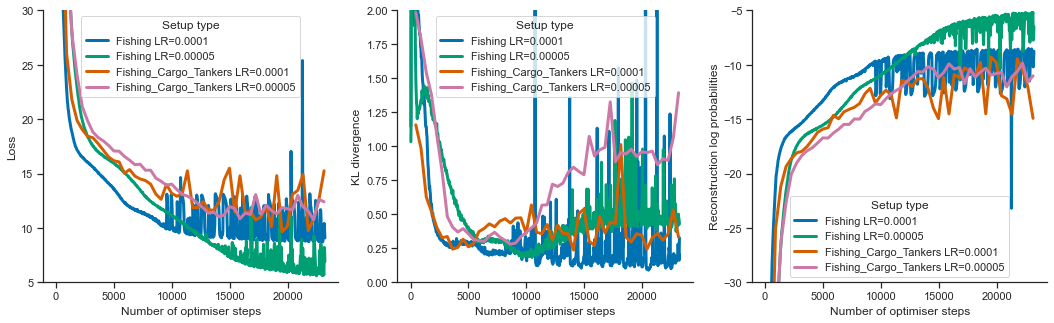

In [13]:
df = pd.concat([df_fish_0001, df_fish_00005, df_fish_carg_tank_0001, df_fish_carg_tank_00005])
df.reset_index(drop=True, inplace=True)

# Plot the learning curves
hue_order = ["Fishing LR=0.0001", "Fishing LR=0.00005", "Fishing_Cargo_Tankers LR=0.0001", "Fishing_Cargo_Tankers LR=0.00005"]
x = "Number of optimiser steps"
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order,
                                          x=x, ylims=[(5, 30), (0, 2.0), (-30, -5)])

# Default model setup - Fishing vessels only - Different dates 
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. The comparison is now done on the new fishing vessel only validation set sampled from 01.05.2019 - 31.05.2019

## Epoch level learning curves

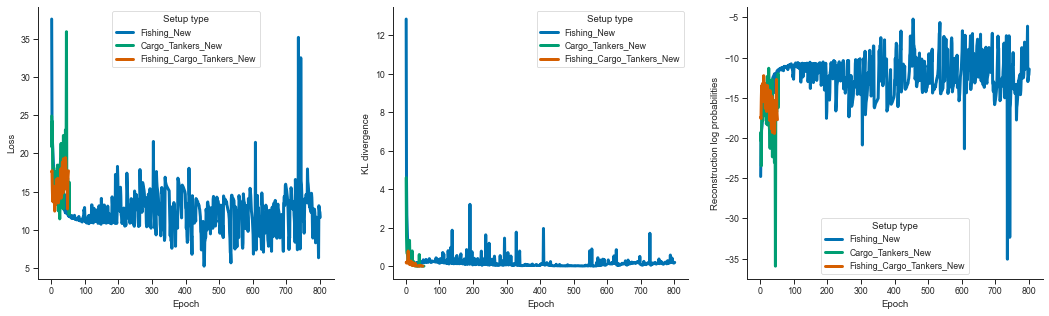

In [6]:
# Use the SummaryModels class
setup_type = "Fishing_New"
model_prefix = "New_Fishing_vessels_only_"
fishing_new_file = "RegionSkagen_01052019_31052019_Fish_14400_86400_600"
summary_models_fish = SummaryModels("RegionSkagen_01062019_30092019_Fish_14400_86400_600",
                                    model_prefix=model_prefix, generative_dist=generative_dist)
df_fish = summary_models_fish.load_curves_df(setup_type, validation_only=True)
# df_track_lvl_fish = summary_models_fish.run_evaluation(setup_type=setup_type,
#                                                        fishing_new_file=fishing_new_file)["TrajectoryLevelData"] 
# setup_type = "Fishing_E300_New"
# summary_models_fish_e300 = SummaryModels("RegionSkagen_01062019_30092019_Fish_14400_86400_600",
#                                          model_prefix=model_prefix, intermediate_epoch=300)
# df_track_lvl_fish_e300 = summary_models_fish_e300.run_evaluation(setup_type=setup_type,
 #                                                                fishing_new_file=fishing_new_file)["TrajectoryLevelData"] 

# setup_type = "Fishing_I0.5_New"
# summary_models_fish_i05 = SummaryModels("RegionSkagen_01062019_30092019_Fish_14400_86400_600",
#                                        model_prefix=model_prefix, inject_cargo_proportion=0.5)
# df_fish_i05 = summary_models_fish_i05.load_curves_df(setup_type, validation_only=True)
# df_track_lvl_fish_i05 = summary_models_fish_i05.run_evaluation(setup_type=setup_type, 
#                                                               fishing_new_file=fishing_new_file)["TrajectoryLevelData"]

# setup_type = "Fishing_I2.0_New"
# summary_models_fish_i20 = SummaryModels("RegionSkagen_01062019_30092019_Fish_14400_86400_600",
#                                        model_prefix=model_prefix, inject_cargo_proportion= 2.0)
# df_fish_i20 = summary_models_fish_i20.load_curves_df(setup_type, validation_only=True)
# df_track_lvl_fish_i20 = summary_models_fish_i20.run_evaluation(setup_type=setup_type, 
#                                                                fishing_new_file=fishing_new_file)["TrajectoryLevelData"]

setup_type = "Cargo_Tankers_New"
summary_models_carg_tank = SummaryModels("RegionSkagen_01062019_30092019_CargTank_14400_86400_600",
                                         model_prefix=model_prefix, generative_dist=generative_dist)
df_carg_tank = summary_models_carg_tank.load_curves_df(setup_type, validation_only=True)
# df_track_lvl_carg_tank = summary_models_carg_tank.run_evaluation(setup_type=setup_type,
#                                                                  fishing_new_file=fishing_new_file)["TrajectoryLevelData"] 

setup_type = "Fishing_Cargo_Tankers_New"
summary_models_fish_carg_tank = SummaryModels("RegionSkagen_01062019_30092019_FishCargTank_14400_86400_600", 
                                              model_prefix=model_prefix, generative_dist=generative_dist)
df_fish_carg_tank = summary_models_fish_carg_tank.load_curves_df(setup_type, validation_only=True)
# df_track_lvl_fish_carg_tank = summary_models_fish_carg_tank.run_evaluation(setup_type=setup_type, 
#                                                                            fishing_new_file=fishing_new_file)["TrajectoryLevelData"] 

# Combine the different vessel type date frames 
# df_new = pd.concat([df_fish, df_fish_i05, df_fish_i20, df_carg_tank, df_fish_carg_tank])
df_new = pd.concat([df_fish, df_carg_tank, df_fish_carg_tank])
df_new.reset_index(drop=True, inplace=True)

# Plot the learning curves
# hue_order = ["Fishing_New", "Fishing_I0.5_New", "Fishing_I2.0_New", "Cargo_Tankers_New", "Fishing_Cargo_Tankers_New"]
hue_order = ["Fishing_New", "Cargo_Tankers_New", "Fishing_Cargo_Tankers_New"]
summary_models_fish_carg_tank.plot_curves(df_new[df_new["Data set type"] == "Validation"], hue, hue_order)

## Optimizer steps level learning curves

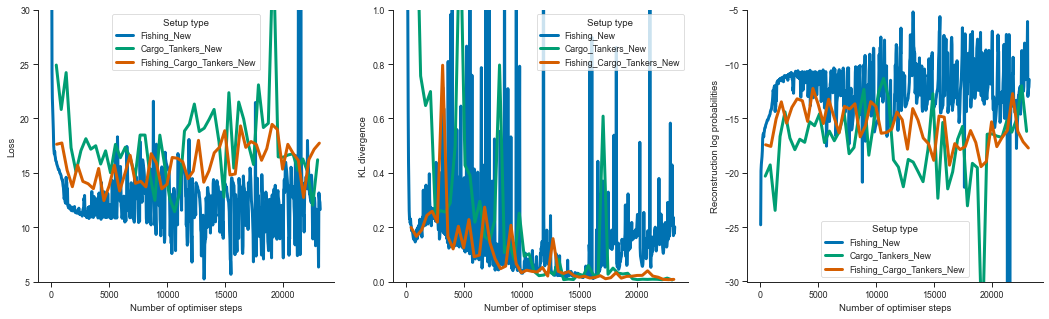

In [8]:
# Use the SummaryModels class
level = "Step"
df_fish = summary_models_fish.load_curves_df("Fishing_New", validation_only=True, level=level)
# df_fish_i05 = summary_models_fish_i05.load_curves_df("Fishing_I0.5_New", validation_only=True, level=level)
# df_fish_i20 = summary_models_fish_i20.load_curves_df("Fishing_I2.0_New", validation_only=True, level=level)
df_carg_tank = summary_models_carg_tank.load_curves_df("Cargo_Tankers_New", validation_only=True, level=level)
df_fish_carg_tank = summary_models_fish_carg_tank.load_curves_df("Fishing_Cargo_Tankers_New", validation_only=True, level=level)

# Combine the different vessel type date frames 
df_new = pd.concat([df_fish, df_carg_tank, df_fish_carg_tank])
df_new.reset_index(drop=True, inplace=True)

# Plot the learning curves
x = "Number of optimiser steps"
summary_models_fish_carg_tank.plot_curves(df_new[df_new["Data set type"] == "Validation"], hue, hue_order,
                                          x=x, ylims=[(5, 30), (0, 1.0), (-30, -5)])